In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt
from matplotlib.pyplot import figure
%config InlineBackend.figure_format='retina'

## Numerical exercises 03: financial markets.

In this exercise the pricing of a put and call european options is performed through Monte Carlo methods. Financial markets are a complex system, loosely defined as a "place" in which buyers and sellers exchange products (assets). The price of each of these assets $S(t)$ is defined by the interplay between demand and offer. Considering the most idealized situation the market exhibits a few significant properties:

-the market is maximally efficient: it is infinitely liquid (possibility for anyone to "cash-in" the asset they are holding) and does not exhibit any friction (no costs related to market operations).

-the time evolution of an asset price is governed by a Geometric Brownin Motion (GBM) with constant parameters.

It is in these limits that exercise is approached.

### Exercise 03.1: Plain vanilla option pricing.

In order to minimize the risk in buying/selling an asset the concept of option is introduced. The option is a particular contrat established between the buyer and the seller that grants the buyer a right while imposing an obligation on the seller. The simplest option (studied in this exercise) is the european option, which has the following properties:
- the seller of the option, known as the writer,
- grants the buyer of the option, known as the holder, 
- the right to purchase (call option) from the writer or to sell (put option) to him an underlying asset (with current spot price $S(t)$)
- for a prescribed strike prike $K$
- at the expiry date $T$.

Clearly the holder will exploit his right only if he gains a profit ($S(T) > K$). The question to be asked (the goal of the exercise) is how much should an option cost? Given the idealized conditions above defined there exists an analytical solution (Black and Scholes):
- Call option: $C[S(t),t] = S(t)N(d_1) - Ke^{-r(T-t)}N(d_2)$
- Put option: $P[S(t),t] = S(t)[N(d_1)-1] - Ke^{-r(T-t)}[N(d_2)-1]$
where:

$$
d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[\ln(\frac{S(t)}{K})+(r+\frac{\sigma^2}{2})(T-t)\right]
$$

$$
d_2 = d_1 -\sigma\sqrt{T-t}
$$

$$
N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}dze^{-z^2/2}
$$

From a numerical point of view, the price of an option can be simulated. In this case the procedure can follow two different paths:
- the price of the asset at the expiry date $T$ can be directly sampled knowing that it follows a geometric Brownian motion.
- Otherwise the price can be estimated simulating at discrete times the geometric Brownian motion itself until the expiry date $T$



The parameters of the exercise are:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$
- $\delta t = 0.01$ for the simulation of the GBM

For comparison the expected prices from the Black and Scholes analytical solution are:
- $call = 14.978$
- $put = 5.460$

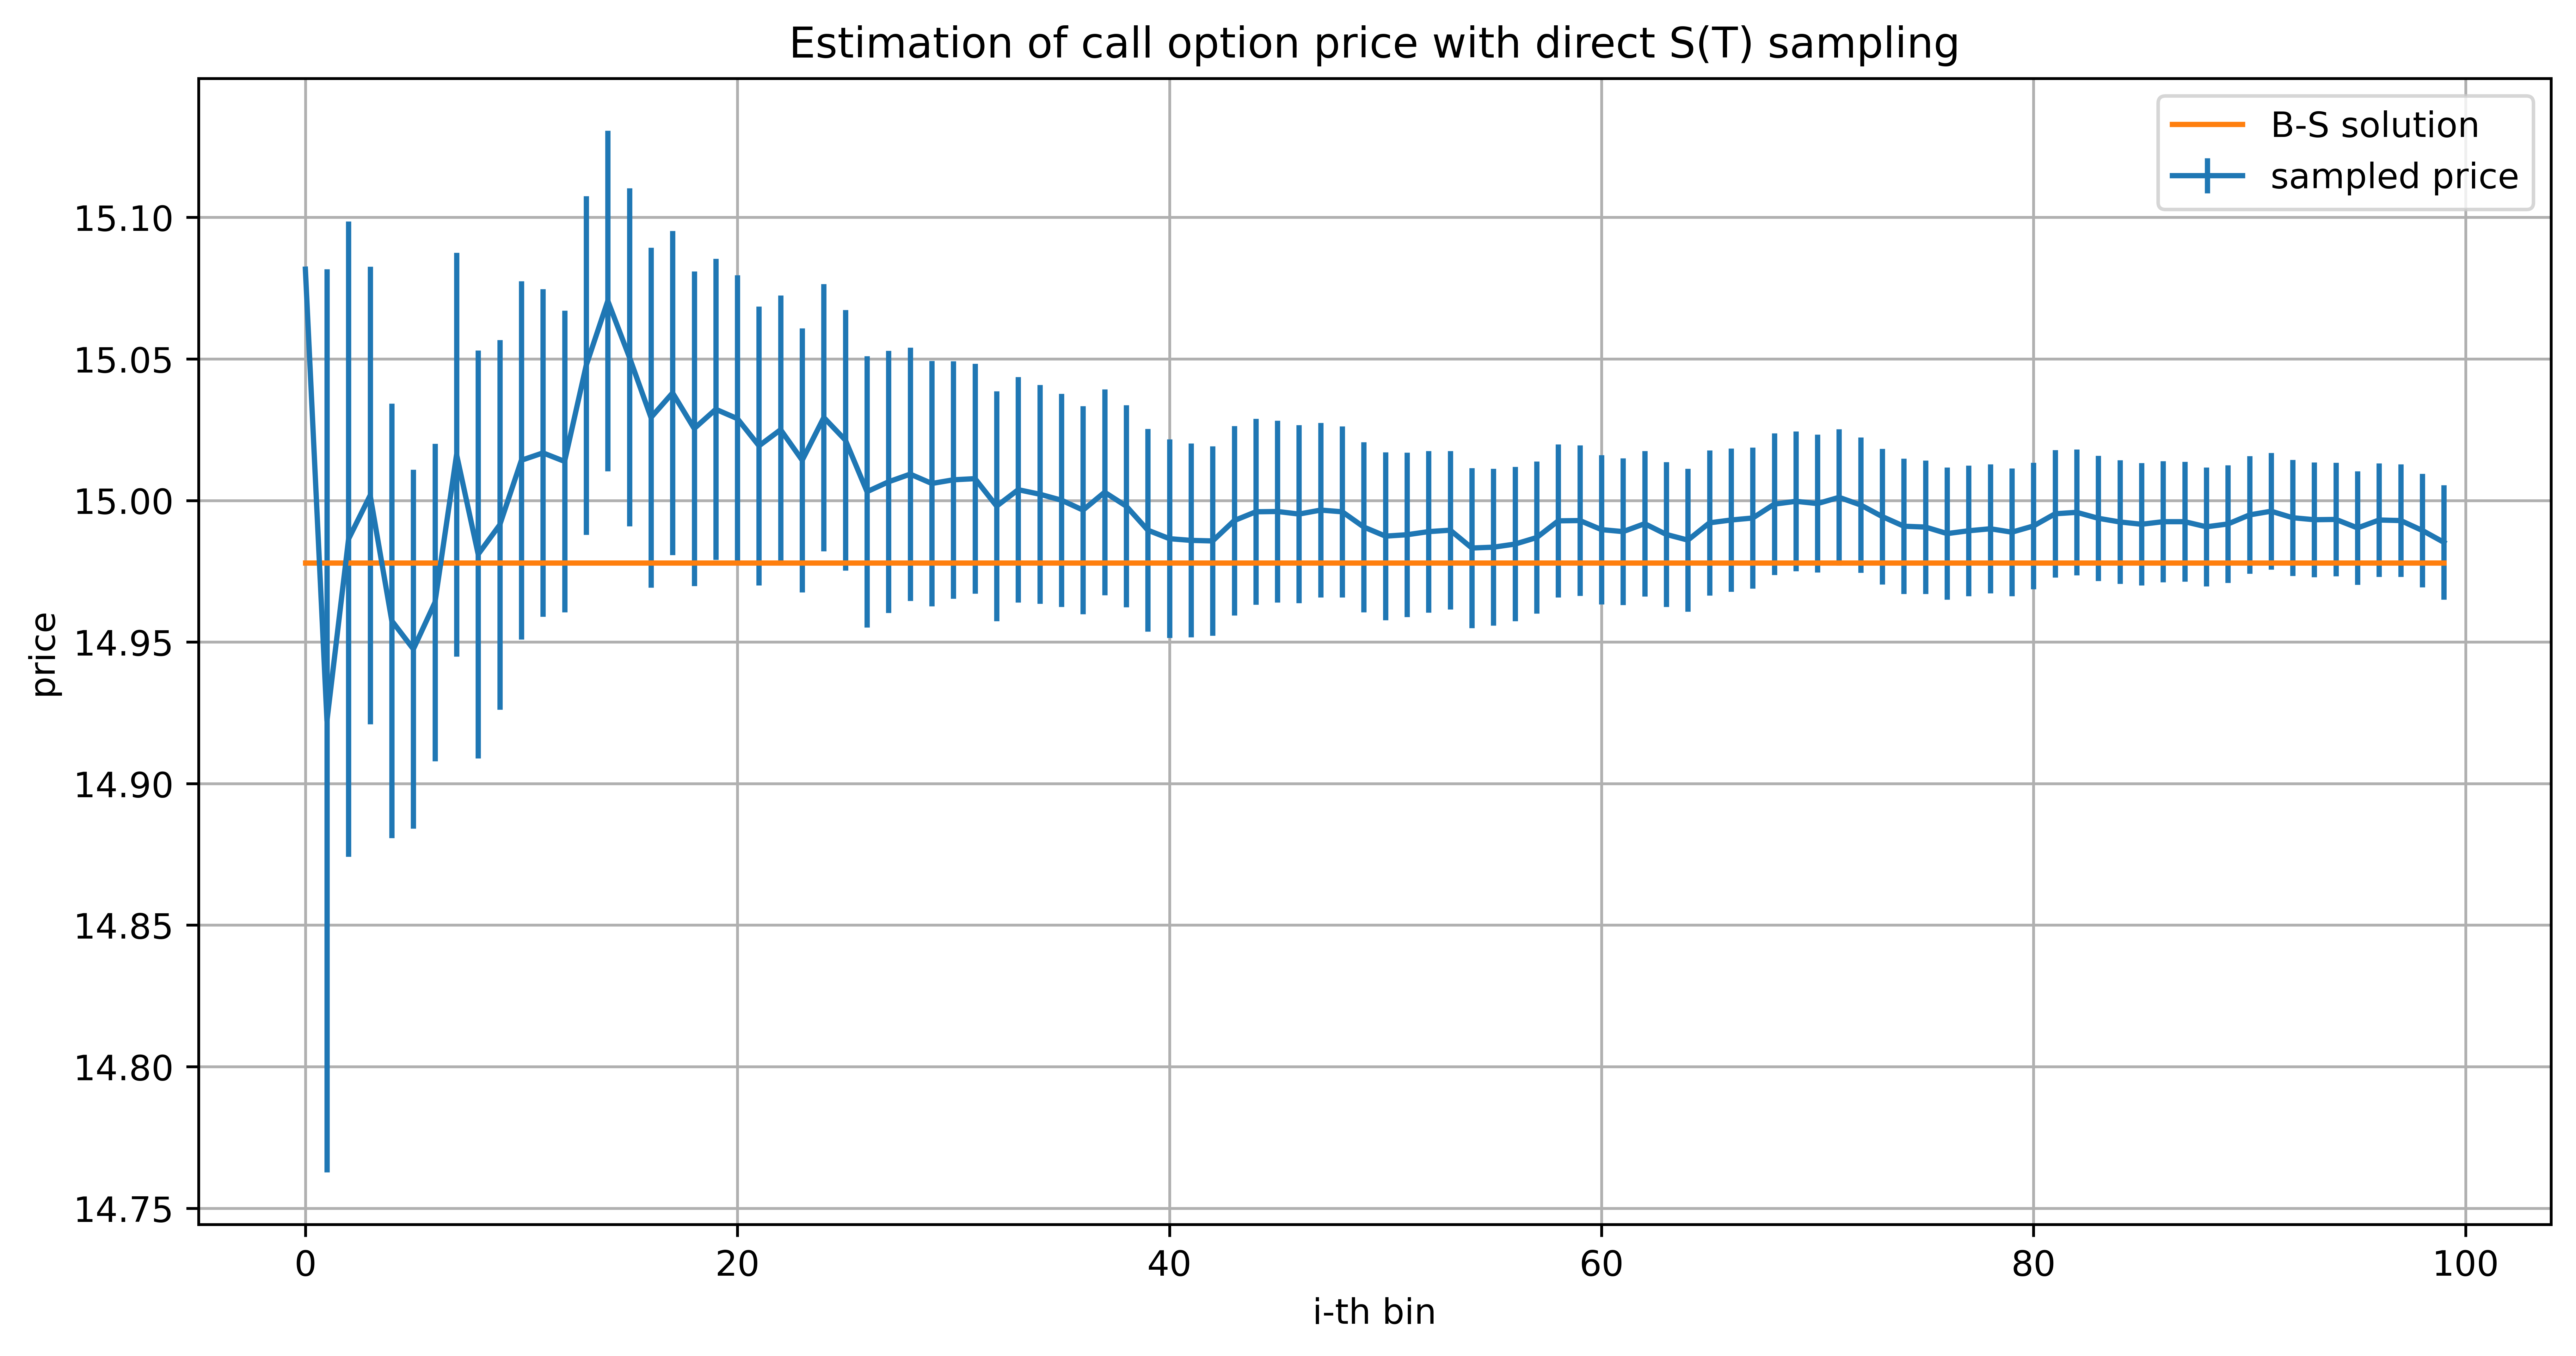

In [2]:
x, f, error = np.loadtxt("direct_sample_call.txt", usecols=(0,1,2), unpack='true')
expected = 14.978
y = np.full(np.size(x), expected)
figure(figsize=(12, 6), dpi=400)
plt.errorbar(x,f,yerr=error, label = "sampled price")
plt.plot(x,y, label = "B-S solution")
plt.xlabel('i-th bin')
plt.ylabel('price')
plt.grid(True)
plt.title("Estimation of call option price with direct S(T) sampling")
plt.legend()
plt.show()


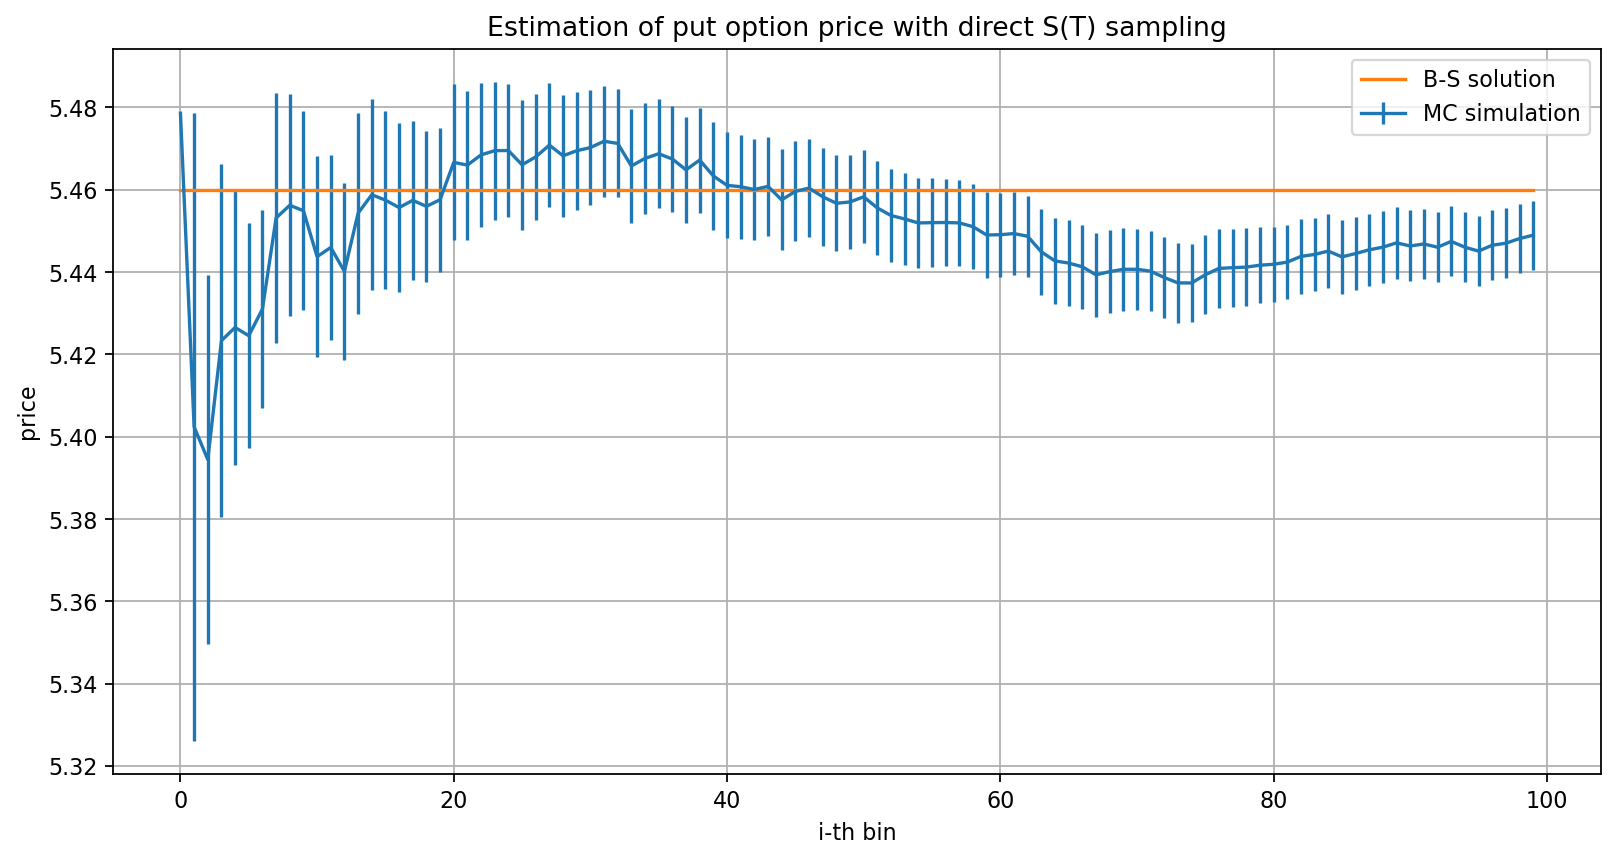

In [3]:
x, f, error = np.loadtxt("direct_sample_put.txt", usecols=(0,1,2), unpack='true')
expected = 5.460
y = np.full(np.size(x), expected)
figure(figsize=(12, 6), dpi=80)
plt.errorbar(x,f,yerr=error, label = "MC simulation")
plt.plot(x,y, label = "B-S solution")
plt.xlabel('i-th bin')
plt.ylabel('price')
plt.grid(True)
plt.title("Estimation of put option price with direct S(T) sampling")
plt.legend()
plt.show()

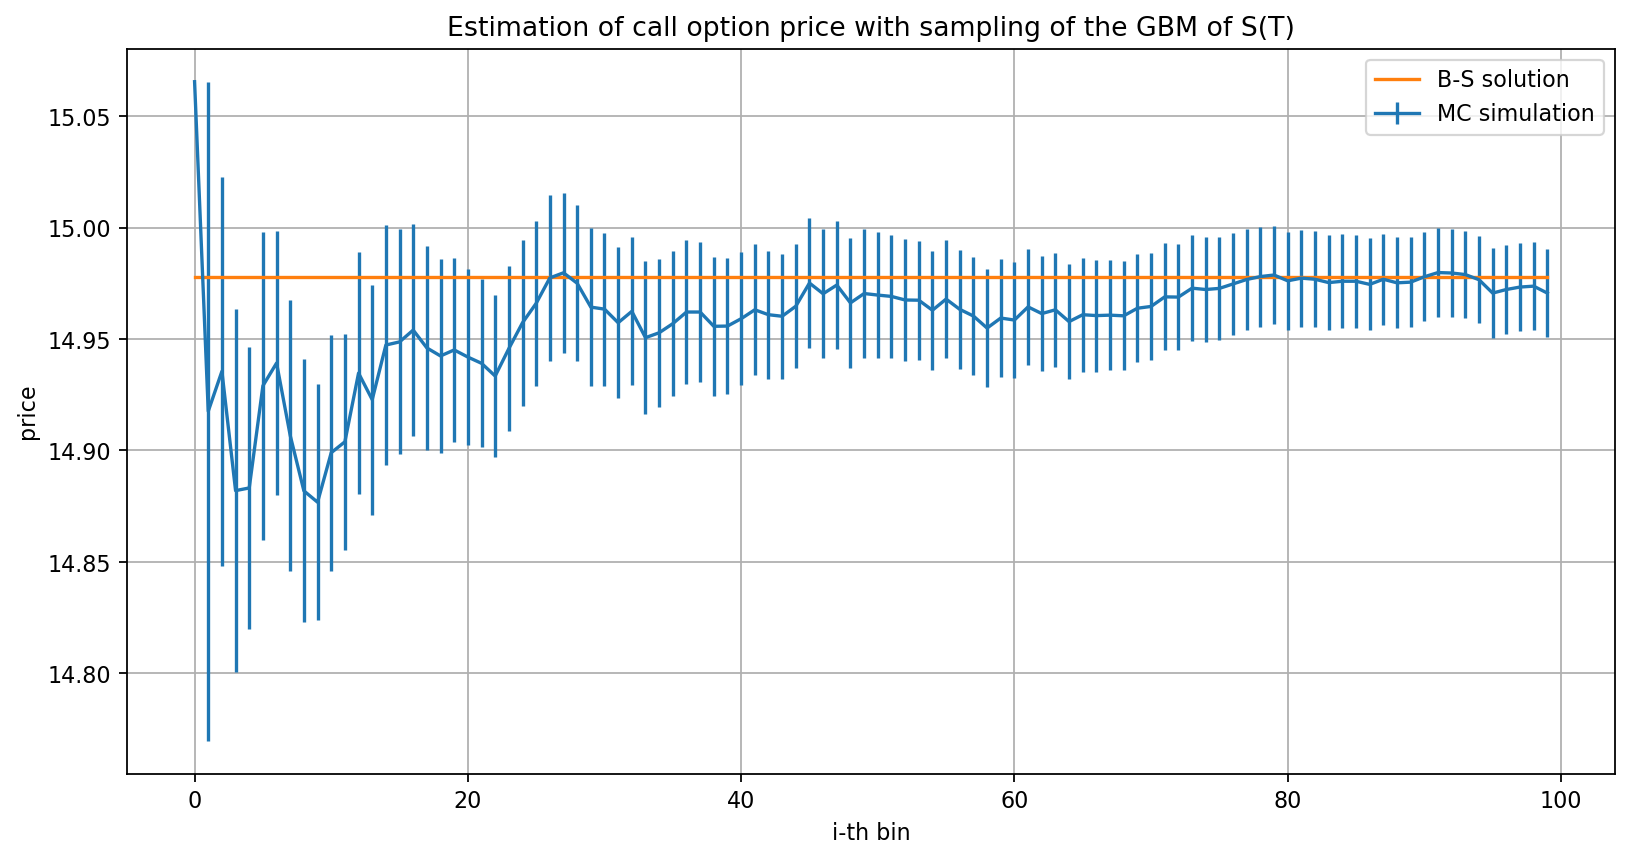

In [4]:
x, f, error = np.loadtxt("indirect_sample_call.txt", usecols=(0,1,2), unpack='true')
expected = 14.978
y = np.full(np.size(x), expected)
figure(figsize=(12, 6), dpi=80)
plt.errorbar(x,f,yerr=error, label = "MC simulation")
plt.plot(x,y, label = "B-S solution")
plt.xlabel('i-th bin')
plt.ylabel('price')
plt.grid(True)
plt.title("Estimation of call option price with sampling of the GBM of S(T)")
plt.legend()
plt.show()

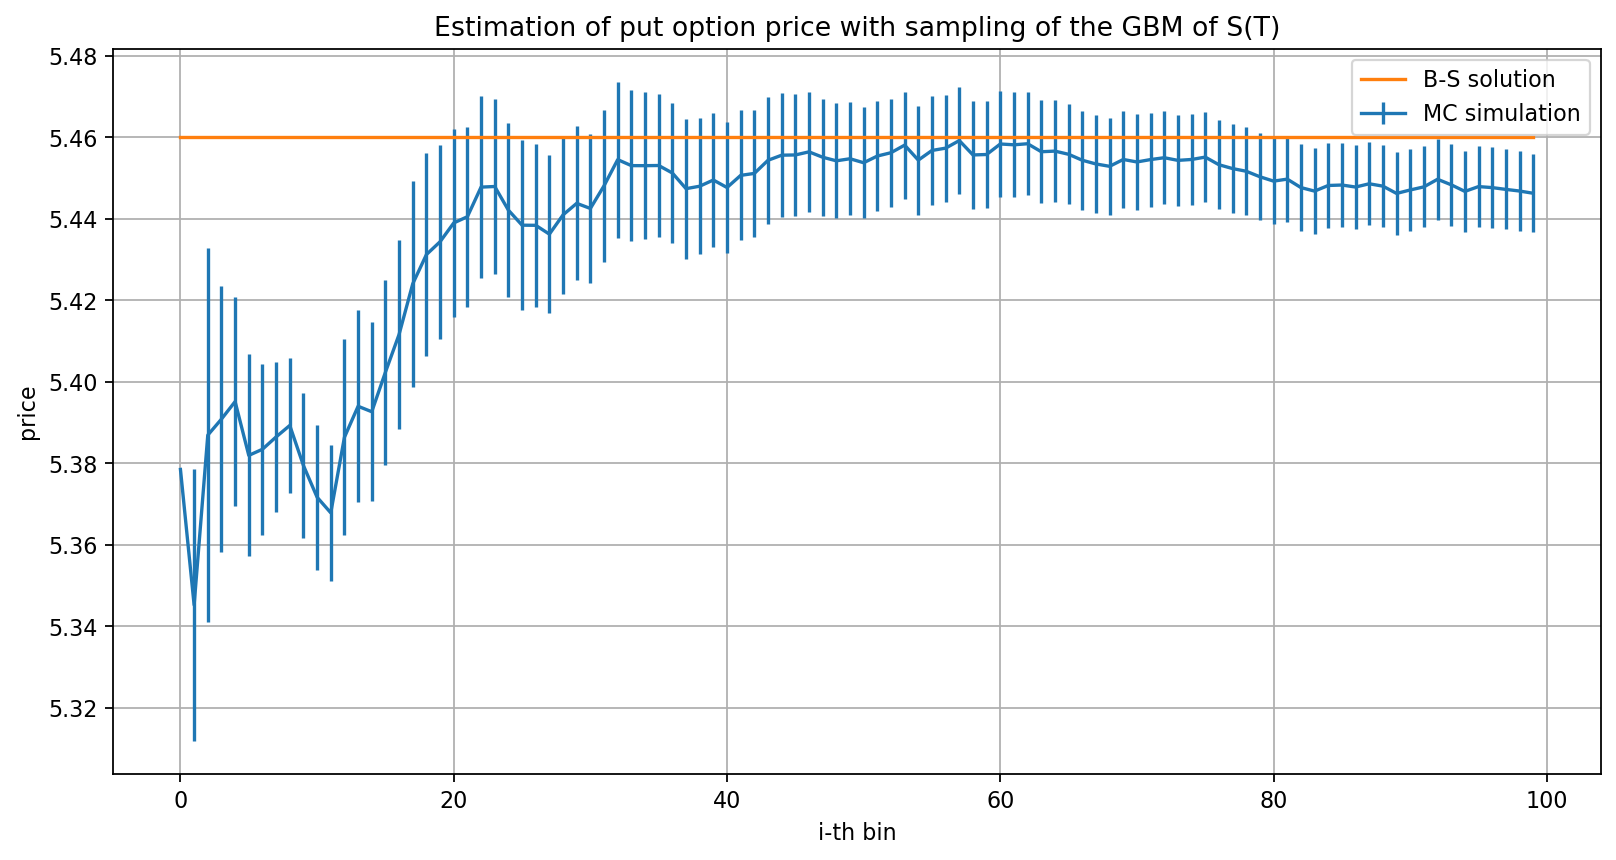

In [5]:
x, f, error = np.loadtxt("indirect_sample_put.txt", usecols=(0,1,2), unpack='true')
expected = 5.460
y = np.full(np.size(x), expected)
figure(figsize=(12, 6), dpi=80)
plt.errorbar(x,f,yerr=error, label = "MC simulation")
plt.plot(x,y, label = "B-S solution")
plt.xlabel('i-th bin')
plt.ylabel('price')
plt.grid(True)
plt.title("Estimation of put option price with sampling of the GBM of S(T)")
plt.legend()
plt.show()

As it is expected the simulated results are in good agreement with the price predicted by the Black and Scholes solution.